<a href="https://colab.research.google.com/github/sameep-git/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb

In [70]:
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

train = train.drop(['Name', 'Cabin', 'Embarked', 'Sex', 'Ticket'], axis = 1)
test = test.drop(['Name', 'Cabin', 'Embarked', 'Sex', 'Ticket'], axis = 1)
#train.loc[train['Sex']=='male', 'Sex'] = 1
#train.loc[train['Sex']=='female', 'Sex'] = 2
#train.loc[train['Embarked']=='C', 'Embarked'] = 1
#train.loc[train['Embarked']=='Q', 'Embarked'] = 2
#train.loc[train['Embarked']=='S', 'Embarked'] = 3

#train['Sex'].astype(str).astype(int)
#train['Embarked'].astype(str).astype(int)

features = ['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare']
X = train[features]
y = train.Survived

reg = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
reg.fit(X, y)

y_pred = reg.predict(test)
y_pred[y_pred < 0.5 ] = 0
y_pred[y_pred >=0.5 ] = 1

ans = pd.DataFrame({"PassengerId": test['PassengerId'], "Survived": y_pred})
ans.to_csv("ans.csv", index=False)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

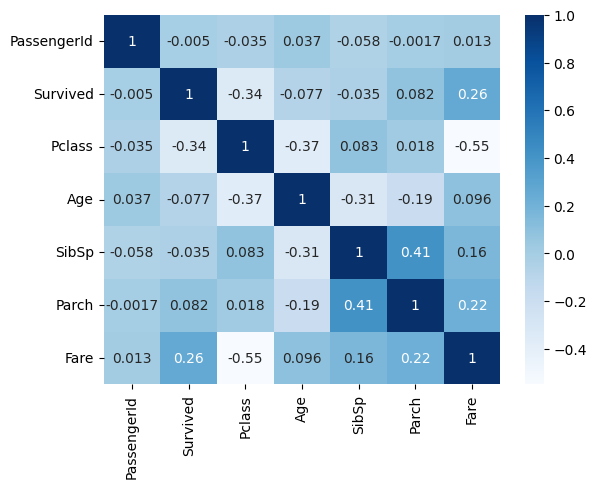

In [74]:
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

corr['Survived'].sort_values(ascending=True)